<a href="https://colab.research.google.com/github/bluebynick/CEE-9730-Data-Science-for-Geotechnical-Engineers/blob/Assignments/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.28+6-1ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
     Sources    F  F_SiO2  F_Al2O3  F_CaO  F_MgO  F_K2O  F_Na2O  F_Fe2O  \
0     Paper1  0.0     0.0      0.0    0.0    0.0    0.0     0.0     0.0   
1    Paper 1  0.0     0.0      0.0    0.0    0.0    0.0     0.0     0.0   
2    Paper 1  0.0     0.0      0.0    0.0    0.0    0.0     0.0     0.0   
3    Paper 1  0.0     0.0      0.0    0.0    0.0    0.0     0.0     0.0   
4    Paper 1  0.0     0.0      0.0    0.0    0.0    0.0     0.0     0.0   
..       ...  ...     ...      ...    ...    ...    ...     ...     ...   
121  Paper 9  0.0     0.0      0.0    0.0    0.0    0.0     0.0     0.0   
122  Paper 9  0.0     0.0      0.0    0.0    0.0    0.0     0.0     0.0   
123  Paper 9  0.0     0.0      0.0    0.0    0.0    0.0     0.0     0.0   
124  Paper 9  

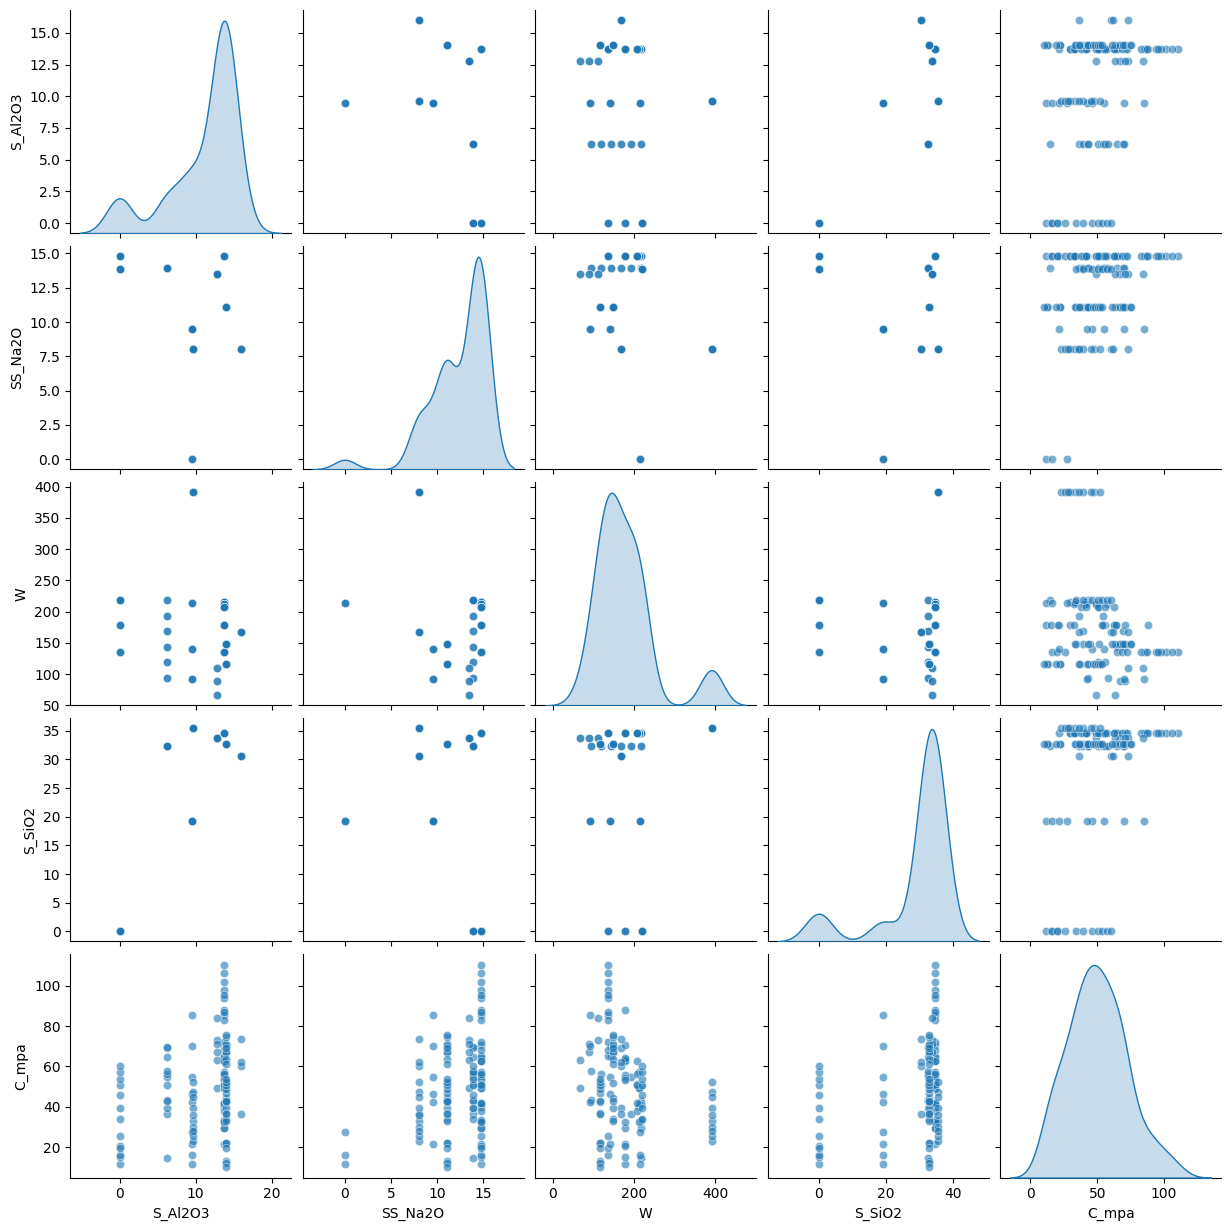

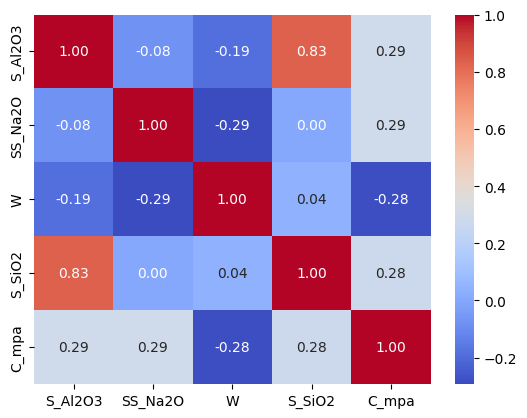

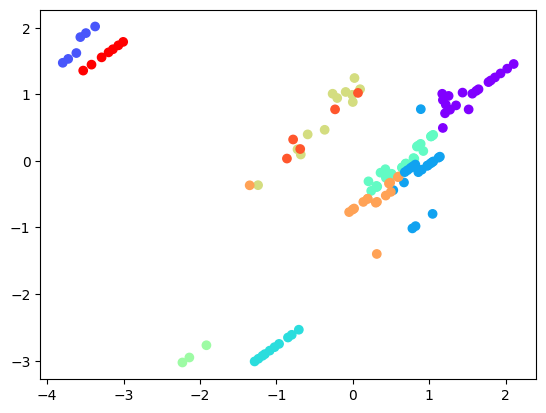

How does compressive strength vary amongst clusters?
Stronger on average = more meaningful clustering against C_mpa
cluster
1    18.100000
5    18.433333
7    29.106250
3    35.990000
4    46.457143
9    48.757143
6    50.025000
8    59.780000
2    60.660000
0    83.410526
Name: C_mpa, dtype: float64


In [8]:
!apt-get install -y openjdk-11-jdk
!pip install tabula-py

import tabula as tb
import pandas as pd

#qu 1
RM_dataFrame = tb.read_pdf("raw data (002).pdf", pages ="all");
df = RM_dataFrame[0]
df.dropna(axis=0, how ="any"); #from tut 3
df.fillna(0); # there's so many 0's in the data that i feel like
# filling the gaps with 0 is more reasonable than the median, mode, etc.
print(df);

#qu 2a
import seaborn as sns #this is what the internet said to use
import matplotlib.pyplot as plt

#generate the pairplot, first by grabbing numeric columns then sending it to .pairplot()
numeric_cols = df.select_dtypes(include='number').columns.tolist()

#find which in the df is correlated w C_mpa
correlation = df[numeric_cols].corr()['C_mpa'].abs().sort_values(ascending=False)

#grab the top ones and set them for the pairplot
topFeatures = correlation.index[1:5].tolist()
featuresToPlot = topFeatures + ['C_mpa']

#the pairplot
sns.pairplot(df[featuresToPlot], diag_kind='kde', plot_kws={'alpha':0.6})
plt.show()

#use this .corr() thing to look through my data and generate a heatmap to illustrate
sns.heatmap(df[featuresToPlot].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

#sanity check
#print(df.select_dtypes(include='number').corr()['C_mpa'].sort_values(ascending=False))

#qu2b.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

clusterer = KMeans(n_clusters = 10, random_state=42) #10 clusters like tut 4
X = df[featuresToPlot].copy() #use all the numeric columns for clustering
X_scaled = StandardScaler().fit_transform(X) #normalise
cluster_labels = clusterer.fit_predict(X_scaled) #assign each row to a cluster

pca = PCA(n_components = 3) #from tut 4. create 3 comp PCA
X_PCA = pca.fit_transform(X_scaled) #fit to data

plt.scatter(X_PCA[:,0], X_PCA[:,1], c=cluster_labels, cmap='rainbow')
#build the scatter x,y of the fitted PCA and
plt.show()

df['cluster'] = cluster_labels
print(df.groupby('cluster')['C_mpa'].mean().sort_values())
